## Đặc trưng của dữ liệu

age: độ tuổi của cá nhân tính theo năm,  
capital_gain: mức tăng vốn trong năm trước,  
capital_loss: mức lỗ vốn trong năm trước,  
education: trình độ học vấn cao nhất mà cá nhân đạt được,  
education-num: dạng số của trình độ học vấn cao nhất đạt được,  
fnlwgt: ước tính số lượng cá nhân trong quần thể có cùng đặc điểm nhân khẩu học với cá nhân này,  
hours_per_week: số giờ làm việc mỗi tuần,  
marital_status: tình trạng hôn nhân của cá nhân,  
native_country: quốc gia bản xứ của cá nhân,  
occupation: nghề nghiệp của cá nhân,  
race: chủng tộc của cá nhân,  
relationship: tình trạng mối quan hệ của cá nhân,  
sex: giới tính của cá nhân,  
workclass: ngành/lĩnh vực mà cá nhân làm việc. 

https://archive.ics.uci.edu/dataset/2/adult

In [29]:
import pandas as pd

# Load data from file
adult_data = pd.read_csv("data/adult.csv")

# Some informations of adult dataset
print(adult_data.shape)
print(adult_data.info())
print(adult_data.describe())

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
                age        fnlwgt  educational-num  capital

In [30]:
# In this dataset, empty values are indicated with a question mark.
print(adult_data.isin(['?']).sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [31]:
import numpy as np

# replace question marks with nan value
adult_data['workclass'] = adult_data['workclass'].replace('?',np.nan)
adult_data['occupation'] = adult_data['occupation'].replace('?',np.nan)
adult_data['native-country'] = adult_data['native-country'].replace('?',np.nan)

adult_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [32]:
# drop the empty values

adult_data = adult_data.dropna()
adult_data.head()
print(adult_data.shape)

(45222, 15)


In [33]:
# Check duplicate lines
print("Number of duplicate lines: ", adult_data.duplicated().sum())

Number of duplicate lines:  47


In [34]:
# Remove the duplicate lines
adult_data = adult_data.drop_duplicates()
print(adult_data.shape)

(45175, 15)


In [35]:
# drop educational-sum because education and educational-sum are the same values, educational-sum values are numeric but random
# drop capital-loss and capital-gain columns
adult_data = adult_data.drop(['educational-num', 'capital-loss', 'capital-gain', 'fnlwgt'], axis = 1)
adult_data.head()


,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


In [36]:
# import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# convert string to number
label_encoder = LabelEncoder()
list_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'] 
for i in list_features:
    adult_data[i] = label_encoder.fit_transform(adult_data[i])
adult_data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,2,1,4,6,3,2,1,40,38,0
1,38,2,11,2,4,0,4,1,50,38,0
2,28,1,7,2,10,0,4,1,40,38,1
3,44,2,15,2,6,0,2,1,40,38,1
5,34,2,0,4,7,1,4,1,30,38,0


In [37]:
# Save the cleaned data
adult_data.to_csv('data/adult_cleaned.csv', index=False)
print(adult_data.shape)

(45175, 11)


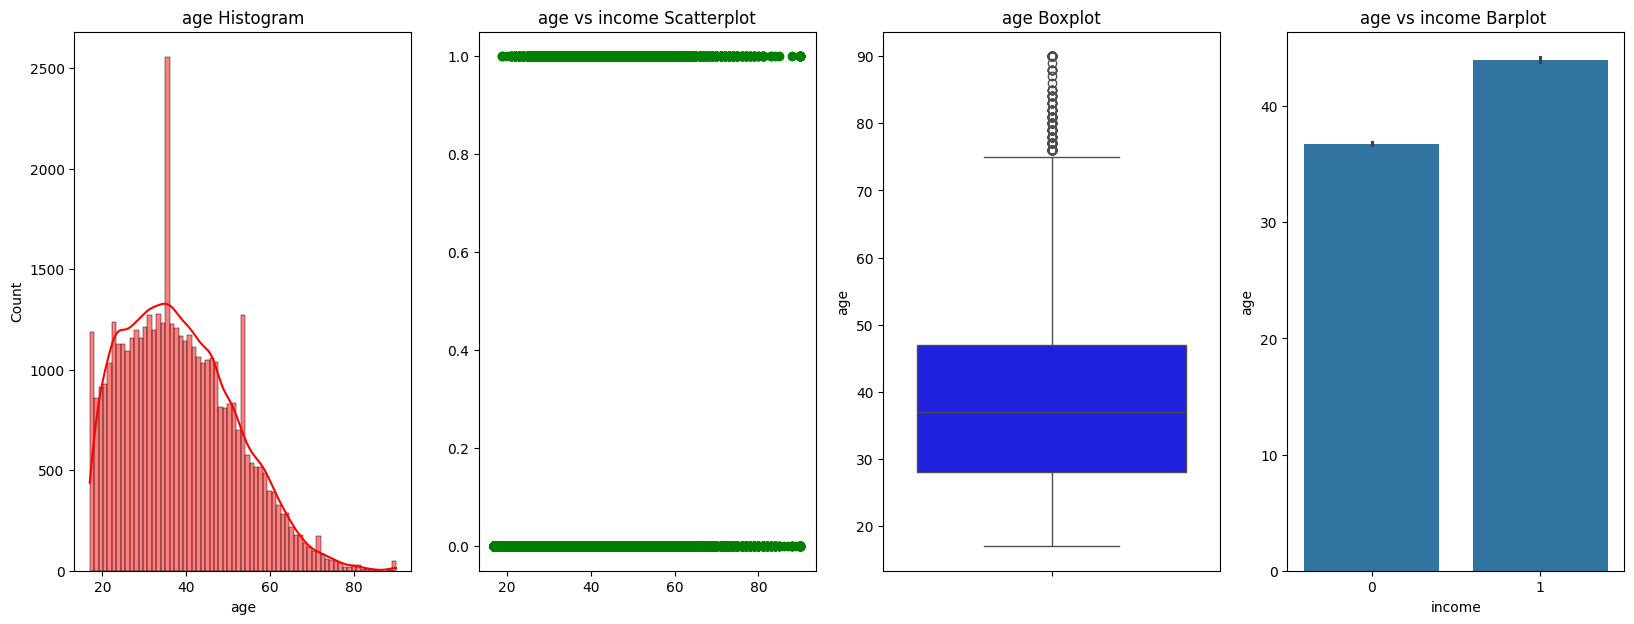

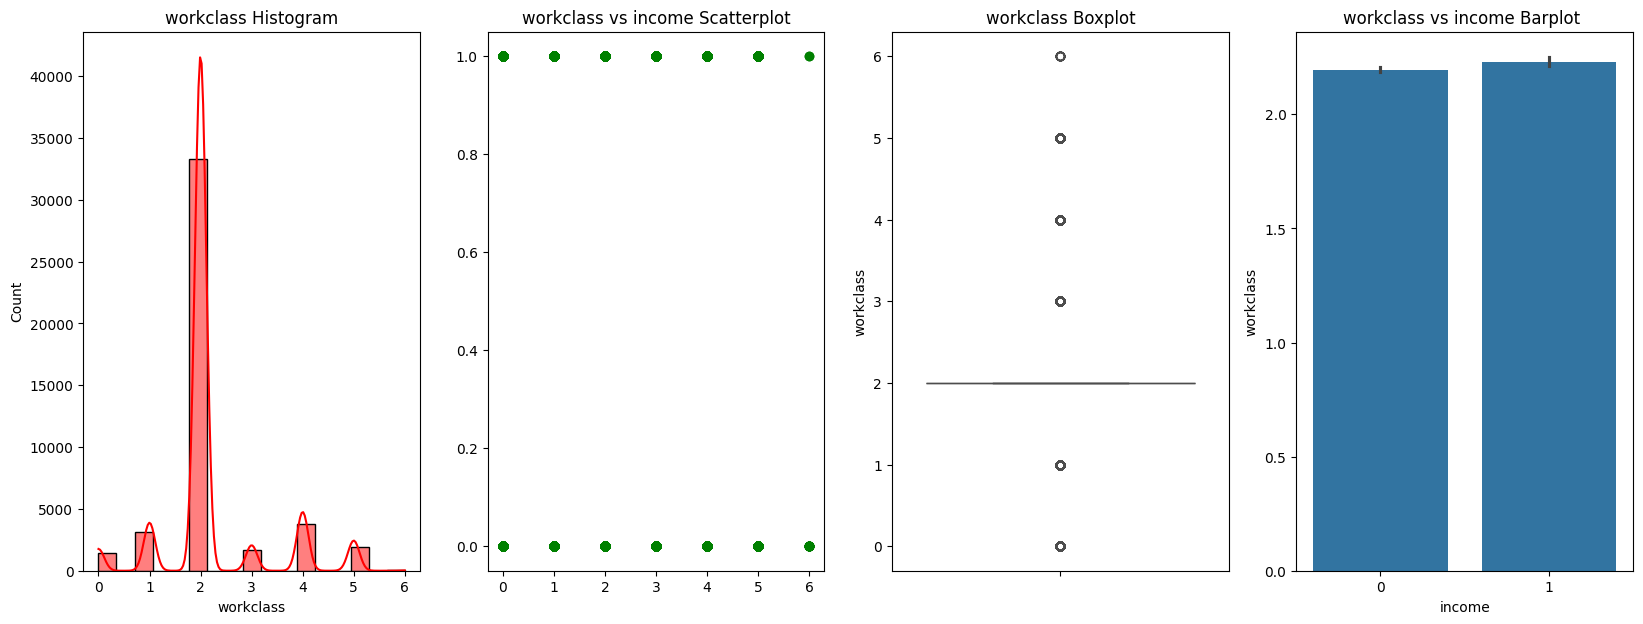

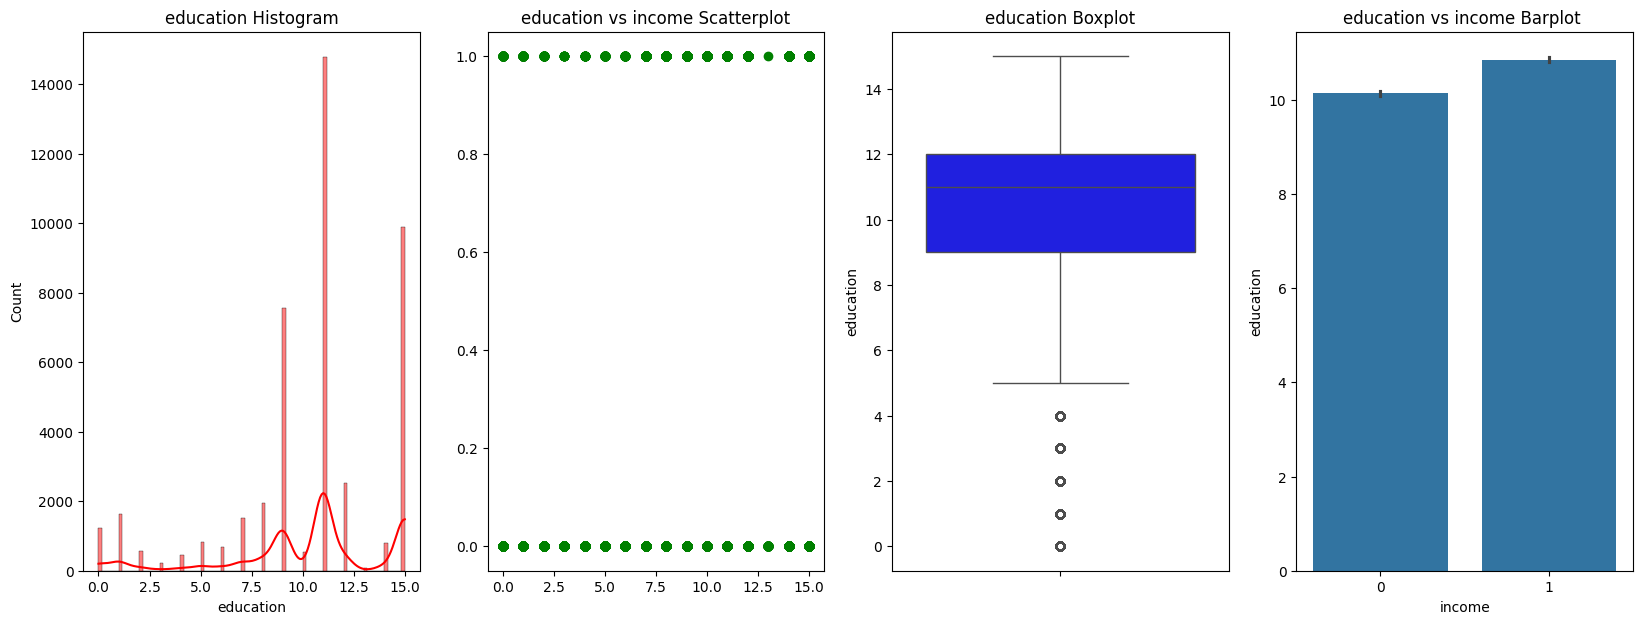

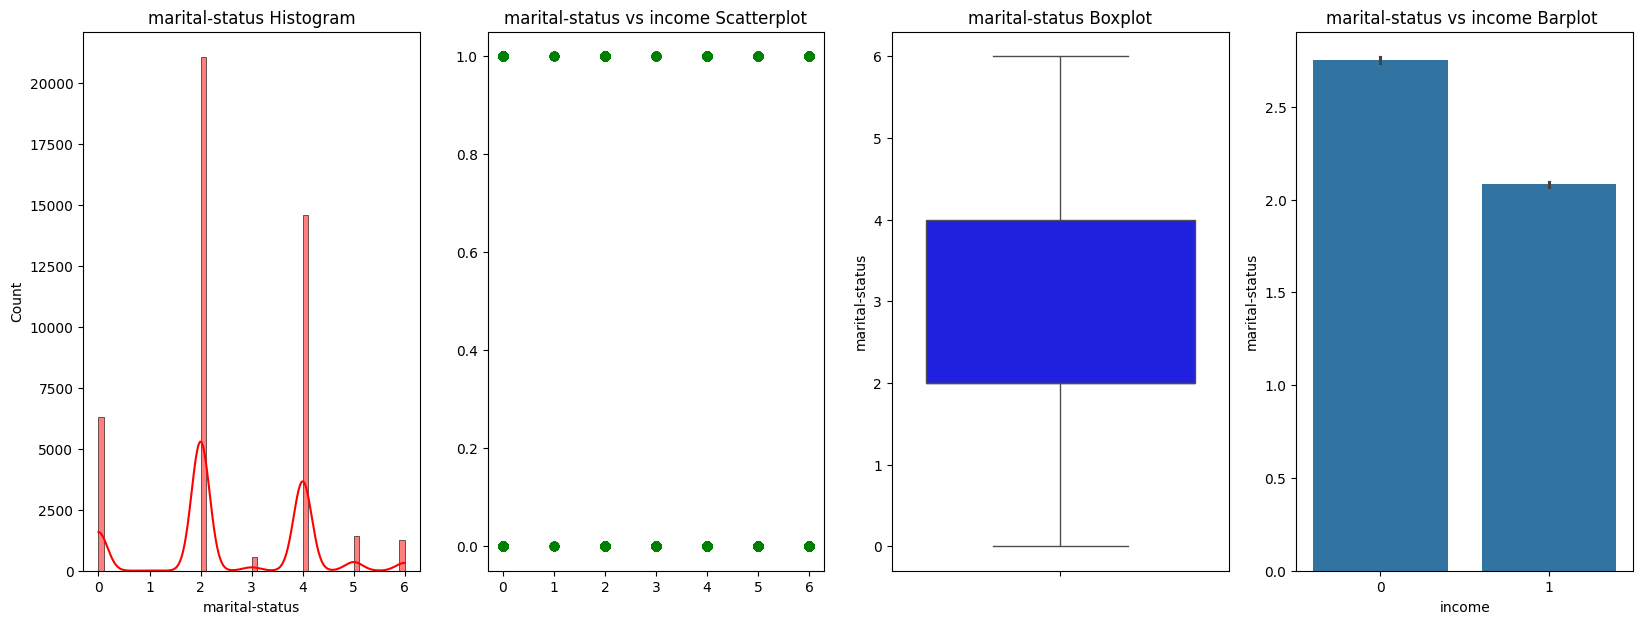

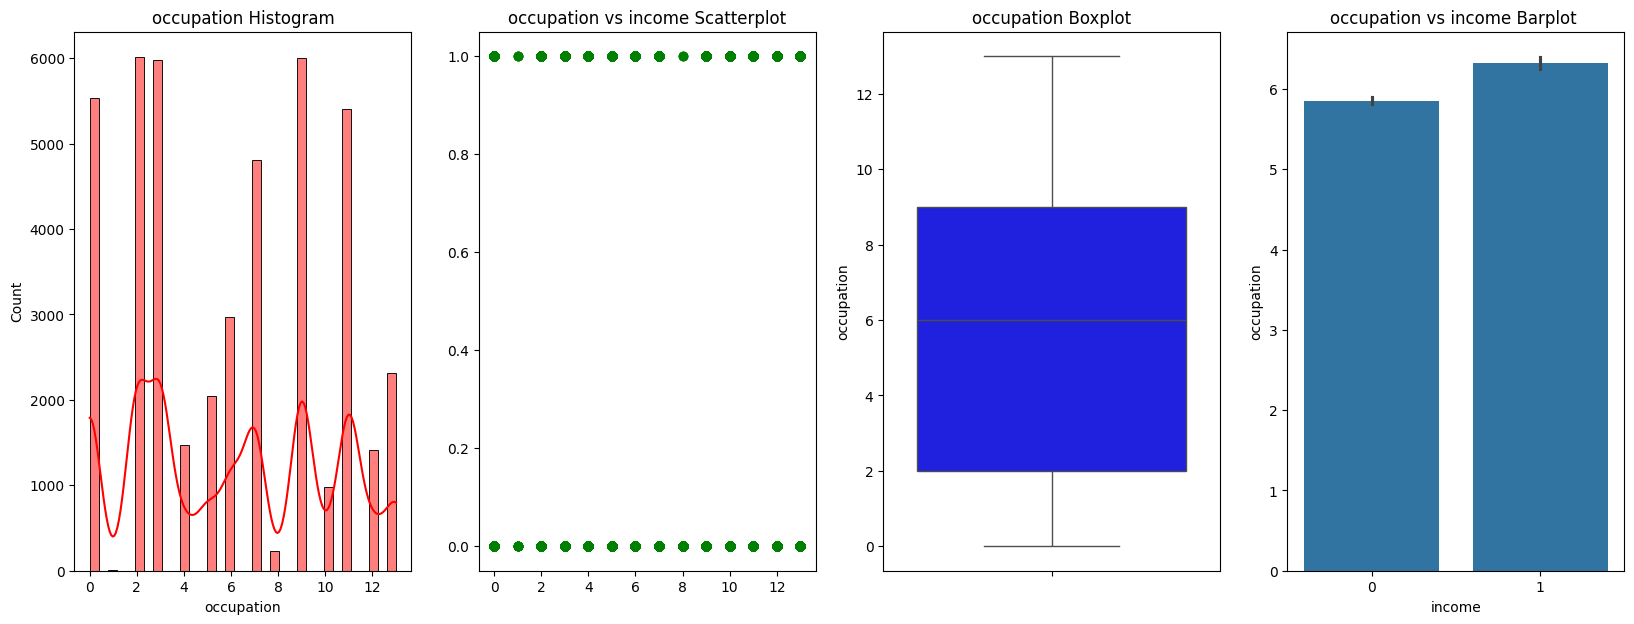

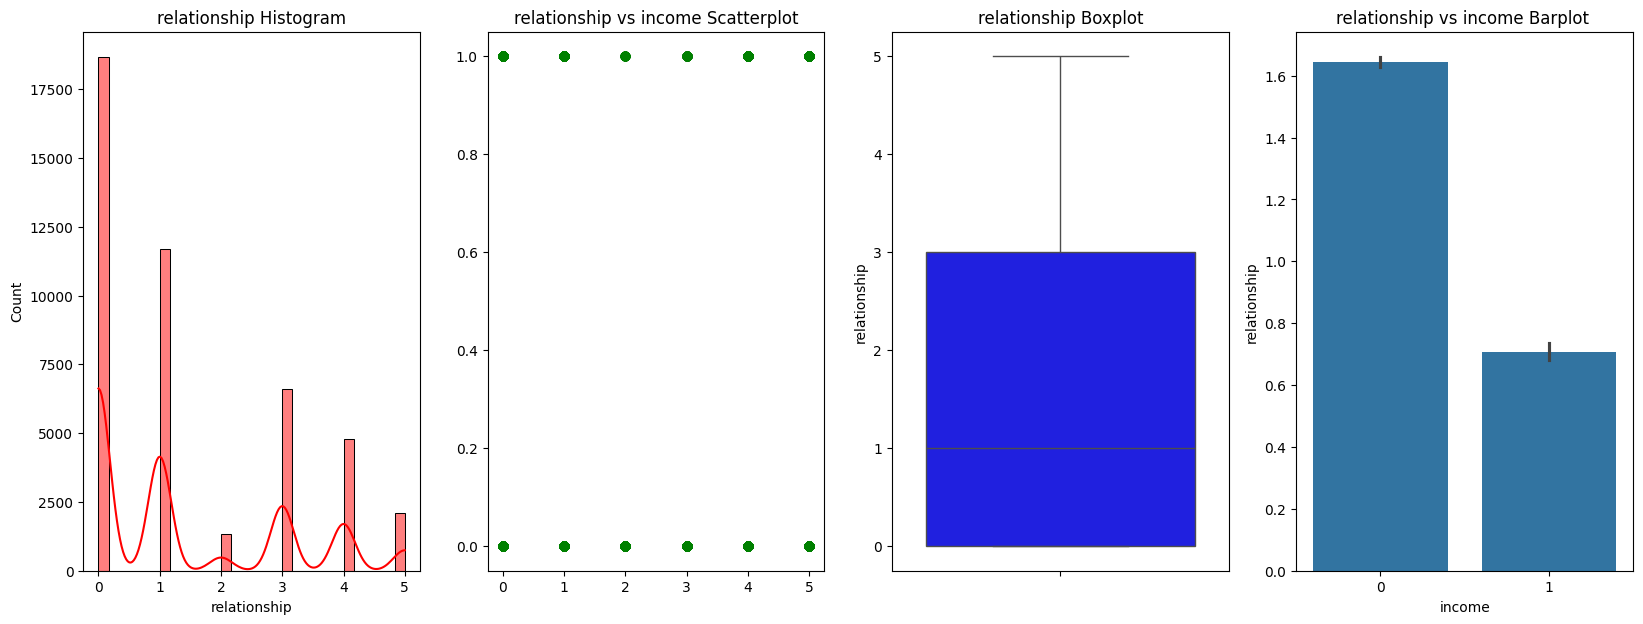

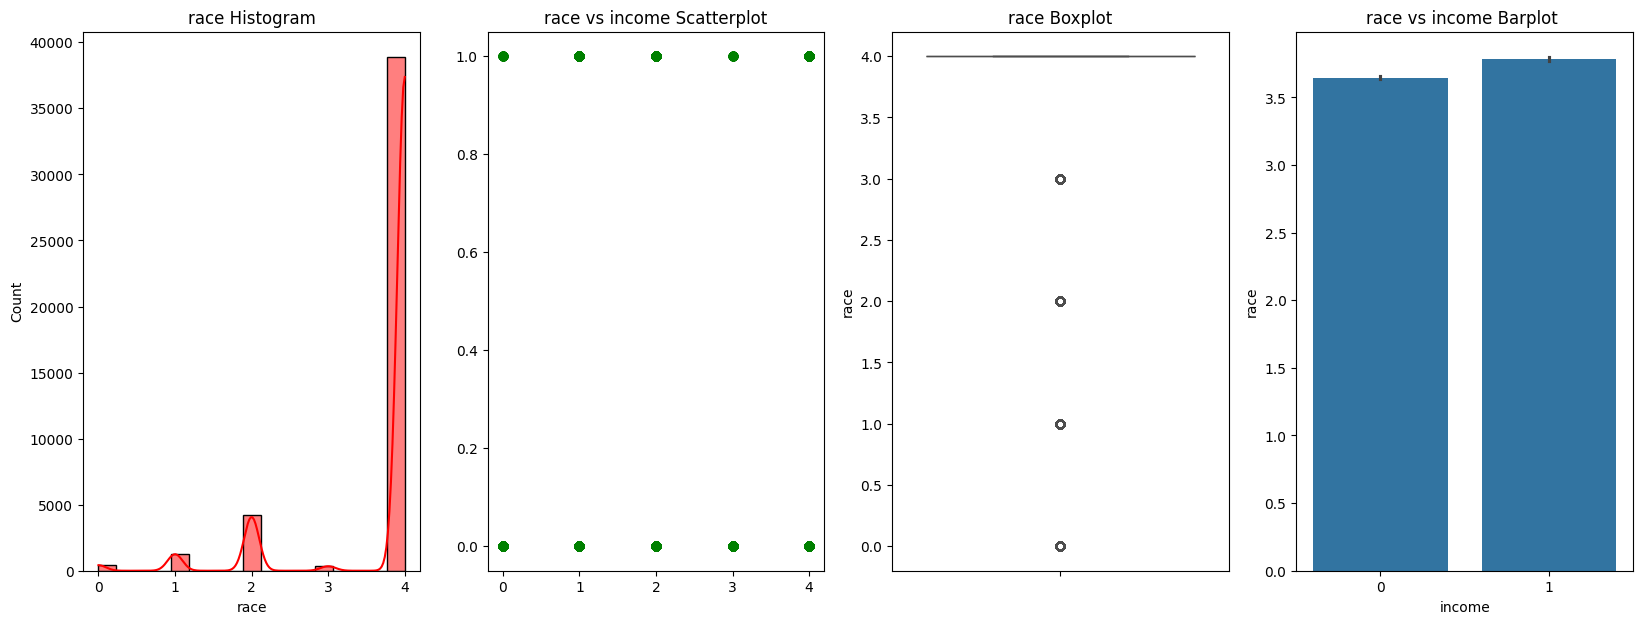

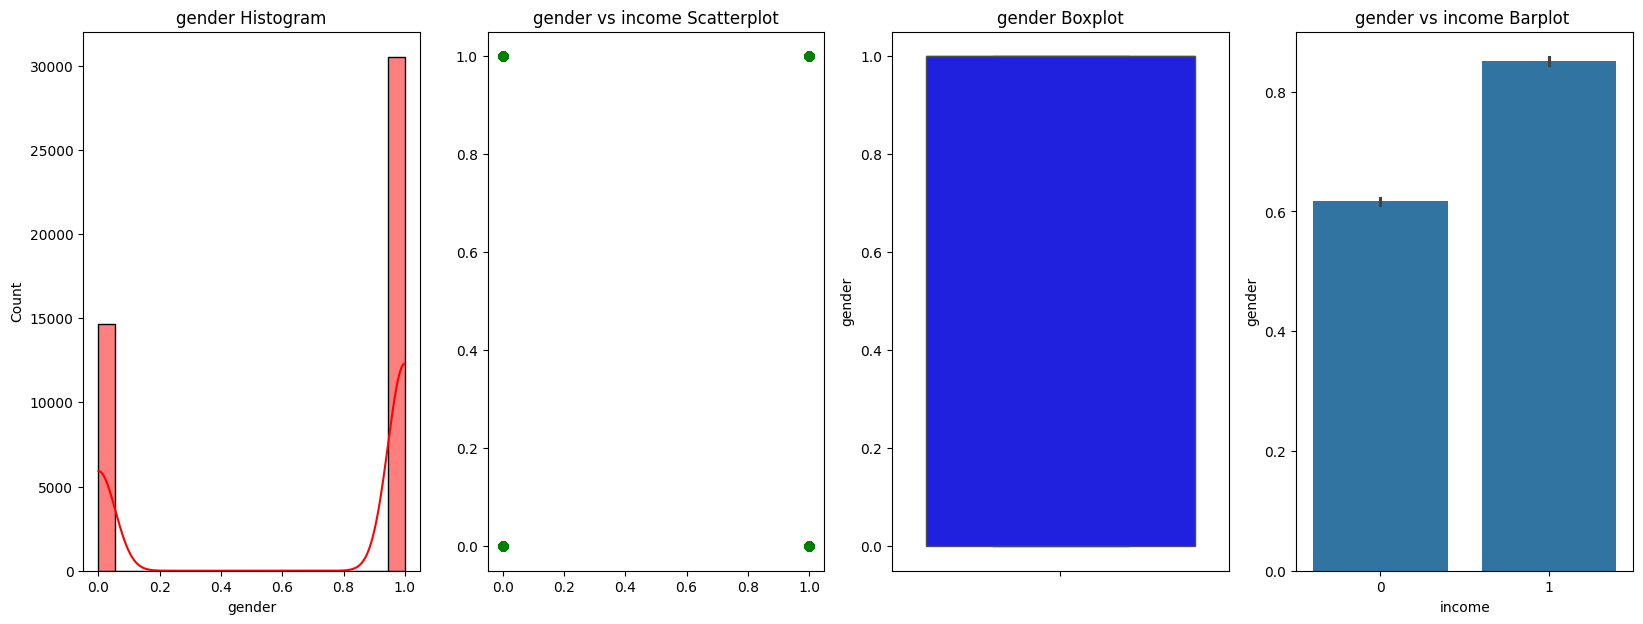

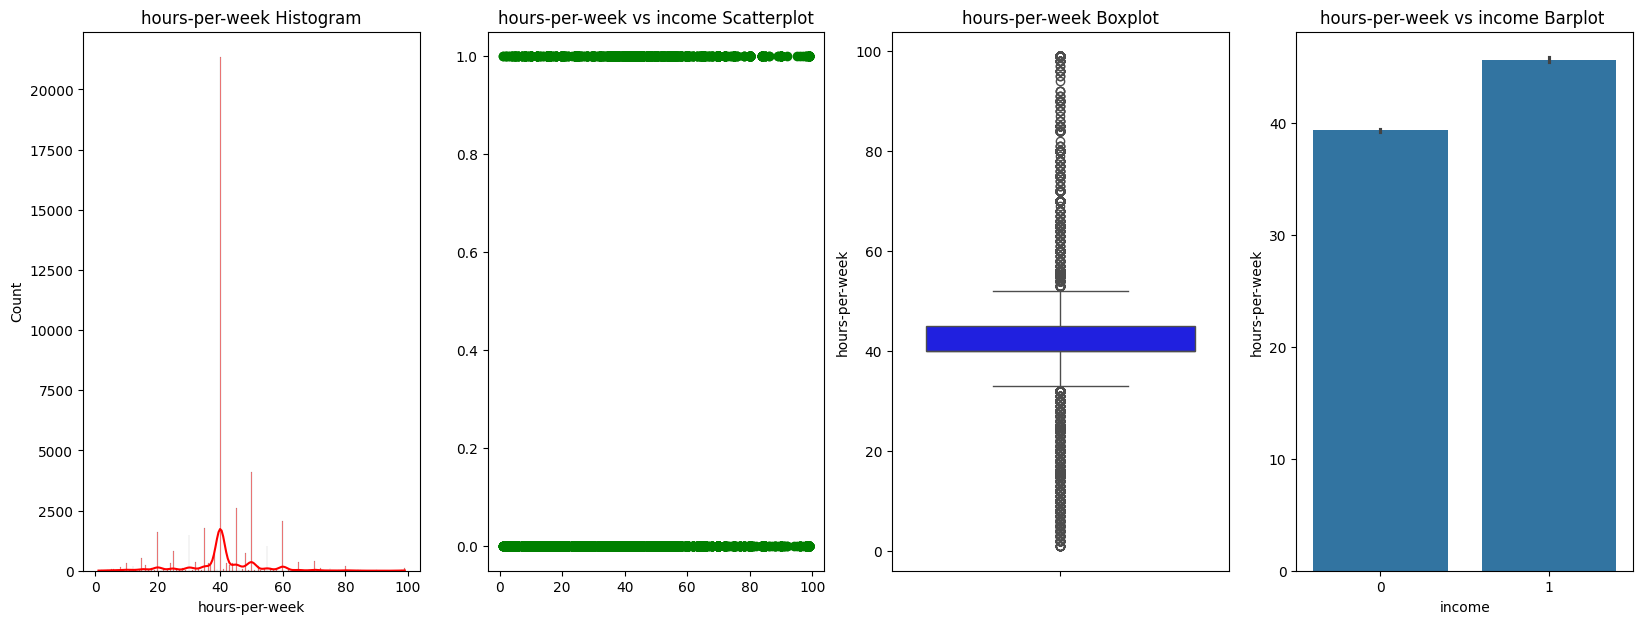

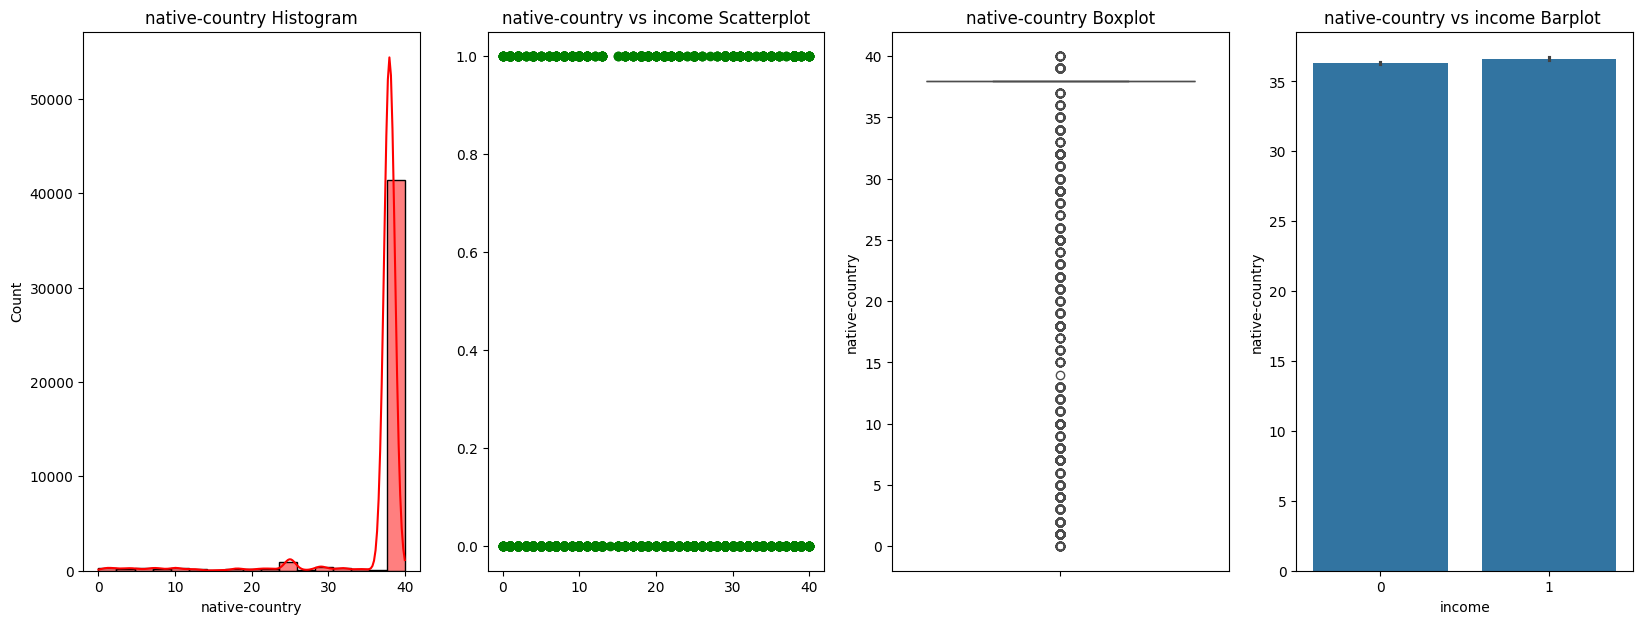

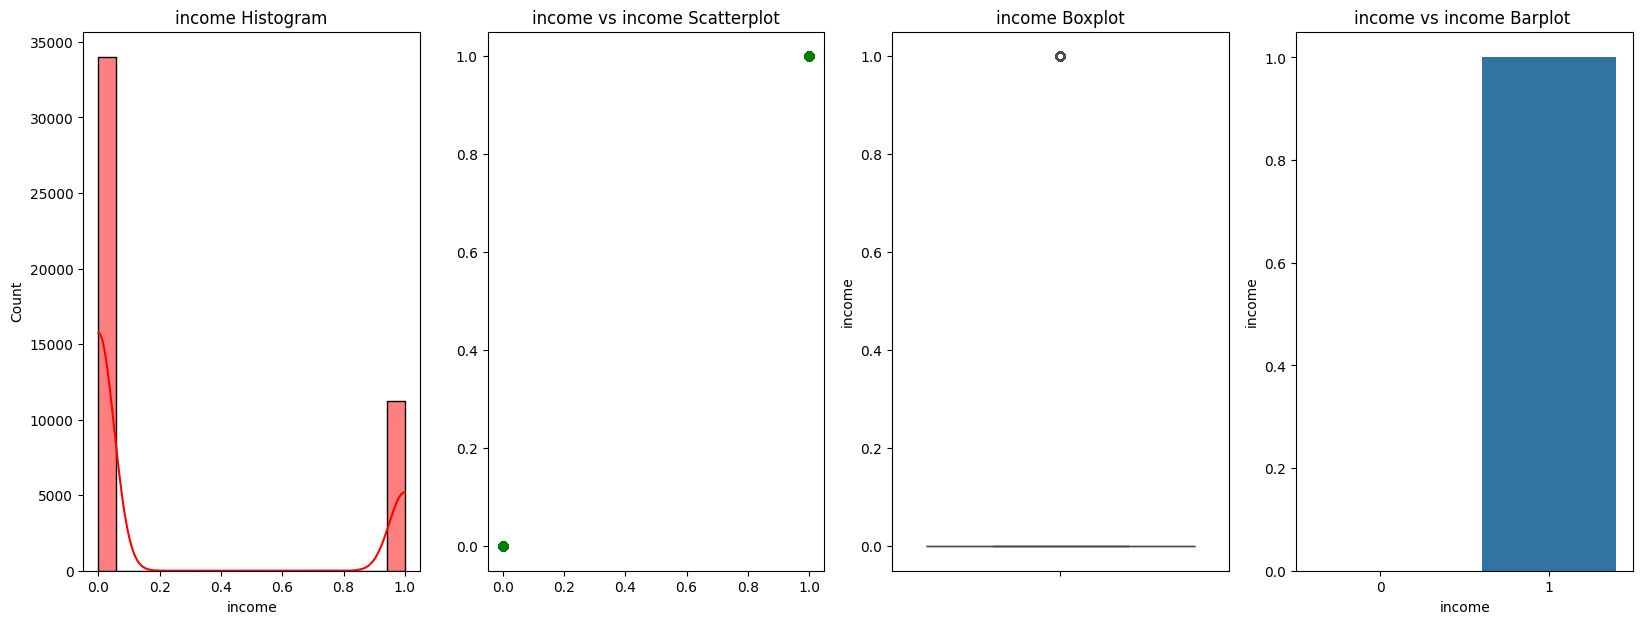

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
# Let's examine the data with various graphs.
def diagnostic_plots(df, variable, target):
    # histogram
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde=True, color='r')
    plt.title(f'{variable} Histogram')

    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable], df[target], color='g')
    plt.title(f'{variable} vs {target} Scatterplot')

    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable], color='b')
    plt.title(f'{variable} Boxplot')

    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x=target, y=variable, data=df)
    plt.title(f'{variable} vs {target} Barplot ')

    plt.show()

for col in adult_data:
    diagnostic_plots(adult_data, col, 'income')